In [25]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#Call data
jan2018 = pd.read_csv('ks-projects-201801.csv')
#dec2016 = pd.read_csv('ks-projects-201612.csv')

In [2]:
jan2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [22]:
dec2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [34]:
#Pledge statistical values
projectPledge2018 = jan2018['usd pledged']

projectPledgeMean2018 = np.mean(projectPledge2018)

#projectPledgeMedian2018 = np.median(projectPledge2018)

projectPledgeStd2018 = np.std(projectPledge2018)

#projectPledgeFirstQuarter2018 = np.percentile(projectPledge2018,25)
#projectPledgeThirdQuarter2018 = np.percentile(projectPledge2018,75)
#projectPledgeInquartileRange2018 = projectPledgeThirdQuarter2018 - projectPledgeFirstQuarter2018

print "Pledge Mean 2018"
print (projectPledgeMean2018)
print ""
print "Pledge Standard Deviation 2018"
print (projectPledgeStd2018)
print ""
#print (projectPledgeMedian2018)

Pledge Mean 2018
7036.728867109139

Pledge Standard Deviation 2018
78639.64041715121



In [35]:
#Revenue statistical values

projectRevenue2018 = jan2018['usd_pledged_real']

projectRevenueMean2018 = np.mean(projectRevenue2018)
projectRevenueStd2018 = np.std(projectRevenue2018)

print "Revenue Mean 2018"
print (projectRevenueMean2018)
print ""
print "Revenue Standard Deviation 2018"
print (projectRevenueStd2018)
print ""



Revenue Mean 2018
9058.92407411907

Revenue Standard Deviation 2018
90973.22298213451



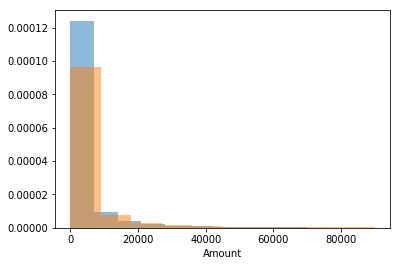

In [54]:
#Draw Project State Histogram

plt.hist(projectPledge2018, range=(0, 70000), bins=10, alpha=0.5, normed=True, label="Pledge")
plt.hist(projectRevenue2018, range=(0, 90000), bins=10, alpha=0.5, normed=True, label="Revenue")

#Labels
plt.xlabel('Amount')
plt.show()